In [1]:
import time
from collections import OrderedDict, namedtuple
import numpy as np
from numpy import linspace
from pandas import DataFrame
from scipy.integrate import odeint, ode
import ggplot as gg
%autosave 600

Autosaving every 600 seconds


In [2]:
HAS_SOLVEIVP = False
try:
    from scipy.integrate import solve_ivp
    HAS_SOLVEIVP = True
except:
    pass
if not HAS_SOLVEIVP:
    try:
        from scipy_ode import solve_ivp
        HAS_SOLVEIVP = True
    except:
        pass
HAS_SOLVEIVP

True

In [3]:
HAS_ODES = False
try:
    from scikits.odes.odeint import odeint as odes_odeint
    from scikits.odes import ode as odes_ode
    HAS_ODES = True
except:
    pass
HAS_ODES

True

# Models to use in performance test

In [9]:
class egfngf_model:
    def __init__(self):
        self.name = 'egfngf'
        self.ts = linspace(0, 120, 121, dtype=float)
        self.has_userdata = True
        self.has_userdata_odes = True
        self.k = [
                    2.18503E-5,
                    0.0121008,
                    1.38209E-7,
                    0.00723811,
                    694.731,
                    6086070.0,
                    389.428,
                    2112.66,
                    1611.97,
                    896896.0,
                    32.344,
                    35954.3,
                    1509.36,
                    1432410.0,
                    0.884096,
                    62464.6,
                    185.759,
                    4768350.0,
                    125.089,
                    157948.0,
                    2.83243,
                    518753.0,
                    9.85367,
                    1007340.0,
                    8.8912,
                    3496490.0,
                    0.0213697,
                    763523.0,
                    10.6737,
                    184912.0,
                    0.0771067,
                    272056.0,
                    0.0566279,
                    653951.0,
                    15.1212,
                    119355.0,
                    146.912,
                    12876.2,
                    1.40145,
                    10965.6,
                    27.265,
                    295990.0,
                    2.20995,
                    1025460.0,
                    0.126329,
                    1061.71,
                    441.287,
                    1.08795E7
                ]
        
        self.userdata = self.k

        self.y0 = [
                    1000,
                    4560,
                    80000.0,
                    0.0,
                    10000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    600000.0,
                    0.0,
                    600000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    120000.0,
                    120000.0,
                    120000.0
                ]

    def f(self, t, y, k):
        return [
            ((-1.0 * k[0] * y[0] * y[2])) + (1.0 * k[1] * y[3]),
            ((-1.0 * k[2] * y[1] * y[4])) + (1.0 * k[3] * y[5]),
            ((-1.0 * k[0] * y[0] * y[2])) + (1.0 * k[1] * y[3]),
            ((1.0 * k[0] * y[0] * y[2]) + (-1.0 * k[1] * y[3])),
            ((-1.0 * k[2] * y[1] * y[4]) + (1.0 * k[3] * y[5])),
            ((1.0 * k[2] * y[1] * y[4]) + (-1.0 * k[3] * y[5])),
            ((-1.0 * k[4] * y[3] * y[6] / (y[6] + k[5])) + (-1.0 * k[6] * y[5] * y[6] / (y[6] + k[7])) + (
                1.0 * k[8] * y[9] * y[7] / (y[7] + k[9]))),
            ((1.0 * k[4] * y[3] * y[6] / (y[6] + k[5])) + (1.0 * k[6] * y[5] * y[6] / (y[6] + k[7])) + (
                -1.0 * k[8] * y[9] * y[7] / (y[7] + k[9]))),
            ((-1.0 * k[26] * y[19] * y[8] / (y[8] + k[27]))),
            ((1.0 * k[26] * y[19] * y[8] / (y[8] + k[27]))),
            ((-1.0 * k[10] * y[7] * y[10] / (y[10] + k[11])) + (1.0 * k[12] * y[28] * y[11] / (y[11] + k[13]))),
            ((1.0 * k[10] * y[7] * y[10] / (y[10] + k[11])) + (-1.0 * k[12] * y[28] * y[11] / (y[11] + k[13]))),
            ((-1.0 * k[14] * y[11] * y[12] / (y[12] + k[15])) + (1.0 * k[44] * y[31] * y[13] / (y[13] + k[45])) + (
                1.0 * k[34] * y[23] * y[13] / (y[13] + k[35]))),
            ((1.0 * k[14] * y[11] * y[12] / (y[12] + k[15])) + (-1.0 * k[44] * y[31] * y[13] / (y[13] + k[45])) + (
                -1.0 * k[34] * y[23] * y[13] / (y[13] + k[35]))),
            ((-1.0 * k[42] * y[27] * y[14] / (y[14] + k[43])) + (1.0 * k[46] * y[31] * y[15] / (y[15] + k[47]))),
            ((1.0 * k[42] * y[27] * y[14] / (y[14] + k[43])) + (-1.0 * k[46] * y[31] * y[15] / (y[15] + k[47]))),
            ((-1.0 * k[16] * y[13] * y[16] / (y[16] + k[17])) + (-1.0 * k[18] * y[15] * y[16] / (y[16] + k[19])) + (
                1.0 * k[20] * y[30] * y[17] / (y[17] + k[21]))),
            ((1.0 * k[16] * y[13] * y[16] / (y[16] + k[17])) + (1.0 * k[18] * y[15] * y[16] / (y[16] + k[19])) + (
                -1.0 * k[20] * y[30] * y[17] / (y[17] + k[21]))),
            ((-1.0 * k[22] * y[17] * y[18] / (y[18] + k[23])) + (1.0 * k[24] * y[30] * y[19] / (y[19] + k[25]))),
            ((1.0 * k[22] * y[17] * y[18] / (y[18] + k[23])) + (-1.0 * k[24] * y[30] * y[19] / (y[19] + k[25]))),
            ((-1.0 * k[28] * y[3] * y[20] / (y[20] + k[29])) + (-1.0 * k[30] * y[11] * y[20] / (y[20] + k[31]))),
            ((1.0 * k[28] * y[3] * y[20] / (y[20] + k[29])) + (1.0 * k[30] * y[11] * y[20] / (y[20] + k[31]))),
            ((-1.0 * k[32] * y[21] * y[22] / (y[22] + k[33]))),
            ((1.0 * k[32] * y[21] * y[22] / (y[22] + k[33]))),
            ((-1.0 * k[36] * y[5] * y[24] / (y[24] + k[37]))),
            ((1.0 * k[36] * y[5] * y[24] / (y[24] + k[37]))),
            ((-1.0 * k[38] * y[25] * y[26] / (y[26] + k[39])) + (1.0 * k[40] * y[29] * y[27] / (y[27] + k[41]))),
            ((1.0 * k[38] * y[25] * y[26] / (y[26] + k[39])) + (-1.0 * k[40] * y[29] * y[27] / (y[27] + k[41]))),
            0,
            0,
            0,
            0
        ]


    def f_odes(self, t, y, yout, k):
        yout[:] = [
            ((-1.0 * k[0] * y[0] * y[2])) + (1.0 * k[1] * y[3]),
            ((-1.0 * k[2] * y[1] * y[4])) + (1.0 * k[3] * y[5]),
            ((-1.0 * k[0] * y[0] * y[2])) + (1.0 * k[1] * y[3]),
            ((1.0 * k[0] * y[0] * y[2]) + (-1.0 * k[1] * y[3])),
            ((-1.0 * k[2] * y[1] * y[4]) + (1.0 * k[3] * y[5])),
            ((1.0 * k[2] * y[1] * y[4]) + (-1.0 * k[3] * y[5])),
            ((-1.0 * k[4] * y[3] * y[6] / (y[6] + k[5])) + (-1.0 * k[6] * y[5] * y[6] / (y[6] + k[7])) + (
                1.0 * k[8] * y[9] * y[7] / (y[7] + k[9]))),
            ((1.0 * k[4] * y[3] * y[6] / (y[6] + k[5])) + (1.0 * k[6] * y[5] * y[6] / (y[6] + k[7])) + (
                -1.0 * k[8] * y[9] * y[7] / (y[7] + k[9]))),
            ((-1.0 * k[26] * y[19] * y[8] / (y[8] + k[27]))),
            ((1.0 * k[26] * y[19] * y[8] / (y[8] + k[27]))),
            ((-1.0 * k[10] * y[7] * y[10] / (y[10] + k[11])) + (1.0 * k[12] * y[28] * y[11] / (y[11] + k[13]))),
            ((1.0 * k[10] * y[7] * y[10] / (y[10] + k[11])) + (-1.0 * k[12] * y[28] * y[11] / (y[11] + k[13]))),
            ((-1.0 * k[14] * y[11] * y[12] / (y[12] + k[15])) + (1.0 * k[44] * y[31] * y[13] / (y[13] + k[45])) + (
                1.0 * k[34] * y[23] * y[13] / (y[13] + k[35]))),
            ((1.0 * k[14] * y[11] * y[12] / (y[12] + k[15])) + (-1.0 * k[44] * y[31] * y[13] / (y[13] + k[45])) + (
                -1.0 * k[34] * y[23] * y[13] / (y[13] + k[35]))),
            ((-1.0 * k[42] * y[27] * y[14] / (y[14] + k[43])) + (1.0 * k[46] * y[31] * y[15] / (y[15] + k[47]))),
            ((1.0 * k[42] * y[27] * y[14] / (y[14] + k[43])) + (-1.0 * k[46] * y[31] * y[15] / (y[15] + k[47]))),
            ((-1.0 * k[16] * y[13] * y[16] / (y[16] + k[17])) + (-1.0 * k[18] * y[15] * y[16] / (y[16] + k[19])) + (
                1.0 * k[20] * y[30] * y[17] / (y[17] + k[21]))),
            ((1.0 * k[16] * y[13] * y[16] / (y[16] + k[17])) + (1.0 * k[18] * y[15] * y[16] / (y[16] + k[19])) + (
                -1.0 * k[20] * y[30] * y[17] / (y[17] + k[21]))),
            ((-1.0 * k[22] * y[17] * y[18] / (y[18] + k[23])) + (1.0 * k[24] * y[30] * y[19] / (y[19] + k[25]))),
            ((1.0 * k[22] * y[17] * y[18] / (y[18] + k[23])) + (-1.0 * k[24] * y[30] * y[19] / (y[19] + k[25]))),
            ((-1.0 * k[28] * y[3] * y[20] / (y[20] + k[29])) + (-1.0 * k[30] * y[11] * y[20] / (y[20] + k[31]))),
            ((1.0 * k[28] * y[3] * y[20] / (y[20] + k[29])) + (1.0 * k[30] * y[11] * y[20] / (y[20] + k[31]))),
            ((-1.0 * k[32] * y[21] * y[22] / (y[22] + k[33]))),
            ((1.0 * k[32] * y[21] * y[22] / (y[22] + k[33]))),
            ((-1.0 * k[36] * y[5] * y[24] / (y[24] + k[37]))),
            ((1.0 * k[36] * y[5] * y[24] / (y[24] + k[37]))),
            ((-1.0 * k[38] * y[25] * y[26] / (y[26] + k[39])) + (1.0 * k[40] * y[29] * y[27] / (y[27] + k[41]))),
            ((1.0 * k[38] * y[25] * y[26] / (y[26] + k[39])) + (-1.0 * k[40] * y[29] * y[27] / (y[27] + k[41]))),
            0,
            0,
            0,
            0
        ]
        return 0

In [5]:
%load_ext Cython

/usr/local/lib/python3.5/dist-packages/Cython/Distutils/old_build_ext.py:30: UserWarning: Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.
  "Cython.Distutils.old_build_ext does not properly handle dependencies "


In [6]:
%%cython -I /home/benny/git/odes/scikits/odes/sundials/ -I /usr/local/lib/python3.5/dist-packages/scikits.odes-2.3.0.dev0-py3.5-linux-x86_64.egg/scikits/odes/sundials/
## update include flag -I to point to odes/sundials directory!
import numpy as np
from cpython cimport bool
cimport numpy as np
from scikits.odes.sundials.cvode cimport CV_RhsFunction

#scikits.odes allows cython functions only if derived from correct class

cdef class egfngf_cython_model(CV_RhsFunction):
    cdef public ts, k, y0, userdata
    cdef public object name
    cdef public CV_RhsFunction f_odes
    cdef public bool has_userdata, has_userdata_odes
    
    def __cinit__(self):
        self.name = 'egfngf_cython'
        self.ts = np.linspace(0, 120, 121, dtype=float)
        self.has_userdata = True
        self.has_userdata_odes = True
        self.k = np.array([
                    2.18503E-5,
                    0.0121008,
                    1.38209E-7,
                    0.00723811,
                    694.731,
                    6086070.0,
                    389.428,
                    2112.66,
                    1611.97,
                    896896.0,
                    32.344,
                    35954.3,
                    1509.36,
                    1432410.0,
                    0.884096,
                    62464.6,
                    185.759,
                    4768350.0,
                    125.089,
                    157948.0,
                    2.83243,
                    518753.0,
                    9.85367,
                    1007340.0,
                    8.8912,
                    3496490.0,
                    0.0213697,
                    763523.0,
                    10.6737,
                    184912.0,
                    0.0771067,
                    272056.0,
                    0.0566279,
                    653951.0,
                    15.1212,
                    119355.0,
                    146.912,
                    12876.2,
                    1.40145,
                    10965.6,
                    27.265,
                    295990.0,
                    2.20995,
                    1025460.0,
                    0.126329,
                    1061.71,
                    441.287,
                    1.08795E7
                ], float)
        
        self.userdata = self.k

        self.y0 = np.array([
                    1000,
                    4560,
                    80000.0,
                    0.0,
                    10000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    600000.0,
                    0.0,
                    600000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    0.0,
                    120000.0,
                    120000.0,
                    120000.0,
                    120000.0
                ], float)

    cpdef np.ndarray[double, ndim=1] f(self, double t, np.ndarray[double, ndim=1] y, 
                                       np.ndarray[double, ndim=1] k):
        return np.array([
            ((-1.0 * k[0] * y[0] * y[2])) + (1.0 * k[1] * y[3]),
            ((-1.0 * k[2] * y[1] * y[4])) + (1.0 * k[3] * y[5]),
            ((-1.0 * k[0] * y[0] * y[2])) + (1.0 * k[1] * y[3]),
            ((1.0 * k[0] * y[0] * y[2]) + (-1.0 * k[1] * y[3])),
            ((-1.0 * k[2] * y[1] * y[4]) + (1.0 * k[3] * y[5])),
            ((1.0 * k[2] * y[1] * y[4]) + (-1.0 * k[3] * y[5])),
            ((-1.0 * k[4] * y[3] * y[6] / (y[6] + k[5])) + (-1.0 * k[6] * y[5] * y[6] / (y[6] + k[7])) + (
                1.0 * k[8] * y[9] * y[7] / (y[7] + k[9]))),
            ((1.0 * k[4] * y[3] * y[6] / (y[6] + k[5])) + (1.0 * k[6] * y[5] * y[6] / (y[6] + k[7])) + (
                -1.0 * k[8] * y[9] * y[7] / (y[7] + k[9]))),
            ((-1.0 * k[26] * y[19] * y[8] / (y[8] + k[27]))),
            ((1.0 * k[26] * y[19] * y[8] / (y[8] + k[27]))),
            ((-1.0 * k[10] * y[7] * y[10] / (y[10] + k[11])) + (1.0 * k[12] * y[28] * y[11] / (y[11] + k[13]))),
            ((1.0 * k[10] * y[7] * y[10] / (y[10] + k[11])) + (-1.0 * k[12] * y[28] * y[11] / (y[11] + k[13]))),
            ((-1.0 * k[14] * y[11] * y[12] / (y[12] + k[15])) + (1.0 * k[44] * y[31] * y[13] / (y[13] + k[45])) + (
                1.0 * k[34] * y[23] * y[13] / (y[13] + k[35]))),
            ((1.0 * k[14] * y[11] * y[12] / (y[12] + k[15])) + (-1.0 * k[44] * y[31] * y[13] / (y[13] + k[45])) + (
                -1.0 * k[34] * y[23] * y[13] / (y[13] + k[35]))),
            ((-1.0 * k[42] * y[27] * y[14] / (y[14] + k[43])) + (1.0 * k[46] * y[31] * y[15] / (y[15] + k[47]))),
            ((1.0 * k[42] * y[27] * y[14] / (y[14] + k[43])) + (-1.0 * k[46] * y[31] * y[15] / (y[15] + k[47]))),
            ((-1.0 * k[16] * y[13] * y[16] / (y[16] + k[17])) + (-1.0 * k[18] * y[15] * y[16] / (y[16] + k[19])) + (
                1.0 * k[20] * y[30] * y[17] / (y[17] + k[21]))),
            ((1.0 * k[16] * y[13] * y[16] / (y[16] + k[17])) + (1.0 * k[18] * y[15] * y[16] / (y[16] + k[19])) + (
                -1.0 * k[20] * y[30] * y[17] / (y[17] + k[21]))),
            ((-1.0 * k[22] * y[17] * y[18] / (y[18] + k[23])) + (1.0 * k[24] * y[30] * y[19] / (y[19] + k[25]))),
            ((1.0 * k[22] * y[17] * y[18] / (y[18] + k[23])) + (-1.0 * k[24] * y[30] * y[19] / (y[19] + k[25]))),
            ((-1.0 * k[28] * y[3] * y[20] / (y[20] + k[29])) + (-1.0 * k[30] * y[11] * y[20] / (y[20] + k[31]))),
            ((1.0 * k[28] * y[3] * y[20] / (y[20] + k[29])) + (1.0 * k[30] * y[11] * y[20] / (y[20] + k[31]))),
            ((-1.0 * k[32] * y[21] * y[22] / (y[22] + k[33]))),
            ((1.0 * k[32] * y[21] * y[22] / (y[22] + k[33]))),
            ((-1.0 * k[36] * y[5] * y[24] / (y[24] + k[37]))),
            ((1.0 * k[36] * y[5] * y[24] / (y[24] + k[37]))),
            ((-1.0 * k[38] * y[25] * y[26] / (y[26] + k[39])) + (1.0 * k[40] * y[29] * y[27] / (y[27] + k[41]))),
            ((1.0 * k[38] * y[25] * y[26] / (y[26] + k[39])) + (-1.0 * k[40] * y[29] * y[27] / (y[27] + k[41]))),
            0,
            0,
            0,
            0], float)

    
    cpdef int evaluate(self, double t,
                       np.ndarray[double, ndim=1] y,
                       np.ndarray[double, ndim=1] yout,
                       object userdata = None) except? -1:
        #cdef np.ndarray[double, ndim=1] k = self.k  # avoid self.k gives quite some speedup!
        cdef np.ndarray[double, ndim=1] k = userdata
        # avoiding creation of temporary arrays gives quite some speedup!
        yout[0] = ((-1.0 * k[0] * y[0] * y[2])) + (1.0 * k[1] * y[3])
        yout[1] = ((-1.0 * k[2] * y[1] * y[4])) + (1.0 * k[3] * y[5])
        yout[2] = ((-1.0 * k[0] * y[0] * y[2])) + (1.0 * k[1] * y[3])
        yout[3] = ((1.0 * k[0] * y[0] * y[2]) + (-1.0 * k[1] * y[3]))
        yout[4] = ((-1.0 * k[2] * y[1] * y[4]) + (1.0 * k[3] * y[5]))
        yout[5] = ((1.0 * k[2] * y[1] * y[4]) + (-1.0 * k[3] * y[5]))
        yout[6] = ((-1.0 * k[4] * y[3] * y[6] / (y[6] + k[5])) + (-1.0 * k[6] * y[5] * y[6] / (y[6] + k[7])) + (
                1.0 * k[8] * y[9] * y[7] / (y[7] + k[9])))
        yout[7] = ((1.0 * k[4] * y[3] * y[6] / (y[6] + k[5])) + (1.0 * k[6] * y[5] * y[6] / (y[6] + k[7])) + (
                -1.0 * k[8] * y[9] * y[7] / (y[7] + k[9])))
        yout[8] = ((-1.0 * k[26] * y[19] * y[8] / (y[8] + k[27])))
        yout[9] = ((1.0 * k[26] * y[19] * y[8] / (y[8] + k[27])))
        yout[10] = ((-1.0 * k[10] * y[7] * y[10] / (y[10] + k[11])) + (1.0 * k[12] * y[28] * y[11] / (y[11] + k[13])))
        yout[11] = ((1.0 * k[10] * y[7] * y[10] / (y[10] + k[11])) + (-1.0 * k[12] * y[28] * y[11] / (y[11] + k[13])))
        yout[12] = ((-1.0 * k[14] * y[11] * y[12] / (y[12] + k[15])) + (1.0 * k[44] * y[31] * y[13] / (y[13] + k[45])) + (
                1.0 * k[34] * y[23] * y[13] / (y[13] + k[35])))
        yout[13] = ((1.0 * k[14] * y[11] * y[12] / (y[12] + k[15])) + (-1.0 * k[44] * y[31] * y[13] / (y[13] + k[45])) + (
                -1.0 * k[34] * y[23] * y[13] / (y[13] + k[35])))
        yout[14] = ((-1.0 * k[42] * y[27] * y[14] / (y[14] + k[43])) + (1.0 * k[46] * y[31] * y[15] / (y[15] + k[47])))
        yout[15] = ((1.0 * k[42] * y[27] * y[14] / (y[14] + k[43])) + (-1.0 * k[46] * y[31] * y[15] / (y[15] + k[47])))
        yout[16] = ((-1.0 * k[16] * y[13] * y[16] / (y[16] + k[17])) + (-1.0 * k[18] * y[15] * y[16] / (y[16] + k[19])) + (
                1.0 * k[20] * y[30] * y[17] / (y[17] + k[21])))
        yout[17] = ((1.0 * k[16] * y[13] * y[16] / (y[16] + k[17])) + (1.0 * k[18] * y[15] * y[16] / (y[16] + k[19])) + (
                -1.0 * k[20] * y[30] * y[17] / (y[17] + k[21])))
        yout[18] = ((-1.0 * k[22] * y[17] * y[18] / (y[18] + k[23])) + (1.0 * k[24] * y[30] * y[19] / (y[19] + k[25])))
        yout[19] = ((1.0 * k[22] * y[17] * y[18] / (y[18] + k[23])) + (-1.0 * k[24] * y[30] * y[19] / (y[19] + k[25])))
        yout[20] = ((-1.0 * k[28] * y[3] * y[20] / (y[20] + k[29])) + (-1.0 * k[30] * y[11] * y[20] / (y[20] + k[31])))
        yout[21] = ((1.0 * k[28] * y[3] * y[20] / (y[20] + k[29])) + (1.0 * k[30] * y[11] * y[20] / (y[20] + k[31])))
        yout[22] = ((-1.0 * k[32] * y[21] * y[22] / (y[22] + k[33])))
        yout[23] = ((1.0 * k[32] * y[21] * y[22] / (y[22] + k[33])))
        yout[24] = ((-1.0 * k[36] * y[5] * y[24] / (y[24] + k[37])))
        yout[25] = ((1.0 * k[36] * y[5] * y[24] / (y[24] + k[37])))
        yout[26] = ((-1.0 * k[38] * y[25] * y[26] / (y[26] + k[39])) + (1.0 * k[40] * y[29] * y[27] / (y[27] + k[41])))
        yout[27] = ((1.0 * k[38] * y[25] * y[26] / (y[26] + k[39])) + (-1.0 * k[40] * y[29] * y[27] / (y[27] + k[41])))
        yout[28] = 0
        yout[29] = 0
        yout[30] = 0
        yout[31] = 0
        return 0
    

In [8]:
model2 = egfngf_cython_model()
# for the performance comparator, f_odes is the right hand side. 
# For cython odes, it must be CV_RhsFunction, so we make a circular link:
model2.f_odes = model2
models = [egfngf_model(), model2]

# Methods to use to solve the models

In [10]:
class scipy_ode_int:
    name = 'odeint'

    def __call__(self, model, rtol):
        def reordered_ode_userdata(t, y):
            return model.f(y, t, model.userdata)
        def reordered_ode(t, y):
            return model.f(y, t)
        if model.has_userdata:
            result = odeint(reordered_ode_userdata, model.y0, model.ts, rtol=rtol)
        else:
            result = odeint(reordered_ode, model.y0, model.ts, rtol=rtol)
        return result

class scipy_ode_class:
    def __init__(self, name):
        self.name = name

        space_pos = name.find(" ")
        if space_pos > -1:
            self.solver = name[0:space_pos]
            self.method = name[space_pos+1:]
        else:
            self.solver = name
            self.method = None

    def __call__(self, model, rtol):
        solver = ode(model.f)
        solver.set_integrator(self.solver, method=self.method, rtol=rtol,
                              nsteps=10000)
        solver.set_initial_value(model.y0, 0.0)
        if model.has_userdata:
            solver.set_f_params(model.userdata)

        result = np.empty((len(model.ts), len(model.y0)))
        for i, t in enumerate(model.ts):  # Drop t=0.0
            if t == 0:
                result[i, :] = model.y0
                continue
            result[i, :] = solver.integrate(t)

        return result

class scipy_odes_class(scipy_ode_class):

    def __call__(self, model, rtol):
        userdata = None
        if model.has_userdata_odes:
            userdata = model.userdata
        solver = odes_ode(self.solver, model.f_odes, old_api=False,
                          lmm_type=self.method, rtol=rtol,
                          user_data = userdata)
        solution = solver.solve(model.ts, model.y0)
        for i, t in enumerate(model.ts):
            try:
                result[i, :] = solution.values.y[i]
            except:
                # no valid solution anymore
                result[i, :] = 0

        return result

class scipy_solver_class:
    def __init__(self, name):
        self.name = name

    def __call__(self, model, rtol):
        def collected_ode_userdata(t, y):
            return model.f(t, y, model.userdata)
        def collected_ode(t, y):
            return model.f(t, y)

        if model.has_userdata:
            sol = solve_ivp(collected_ode_userdata, [0.0, np.max(model.ts)], model.y0, method=self.name, rtol=rtol, t_eval=model.ts)
        else:
            sol = solve_ivp(collected_ode, [0.0, np.max(model.ts)], model.y0, method=self.name, rtol=rtol, t_eval=model.ts)

        return sol.y.transpose()

In [11]:
methods = [
    scipy_ode_int(),
    scipy_ode_class("vode bdf"),
    scipy_ode_class("vode adams"),
    scipy_ode_class("lsoda"),
    scipy_ode_class("dopri5"),
    scipy_ode_class("dop853"),
    ]
if HAS_SOLVEIVP:
    methods += [scipy_solver_class("RK45"),
                scipy_solver_class("RK23"),
                scipy_solver_class("Radau"),
                scipy_solver_class("BDF"),
                ]
if HAS_ODES:
    methods += [scipy_odes_class("cvode BDF"),
                scipy_odes_class("cvode ADAMS"),
               ]

# Compare the methods with the gold standard

In [12]:

rtols = 10 ** np.arange(-9.0, 0.0)

GoldStandard = namedtuple('GoldStandard', ['name', 'values', 'max'])

gold_standards = []
for model in models:
    print('Gold standard for {}'.format(model.name))
    result = methods[0](model, 1e-12)
    gold_standards.append((model.name, GoldStandard(model.name, result, np.max(result))))

gold_standards = OrderedDict(gold_standards)

data = []
for method in methods:
    for model in models:
        for rtol in rtols:
            print('method: {} model: {} rtol: {}'.format(method.name, model.name, rtol), end='')

            # Run
            tic = time.time()
            result = method(model, rtol)
            toc = time.time() - tic

            # Compare to gold standard
            standard = gold_standards[model.name]
            diff = result - standard.values
            max_rel_diff = np.max(diff/standard.max)

            # Append to table
            record = (method.name, model.name, rtol, max_rel_diff, toc)
            print(' err: {} toc: {}'.format(max_rel_diff, toc))
            data.append(record)


data = DataFrame(data, columns=['method', 'model', 'rtol', 'err', 'time'])

Gold standard for egfngf
Gold standard for egfngf_cython
method: odeint model: egfngf rtol: 1e-09 err: 7.494591409340501e-10 toc: 0.35076093673706055
method: odeint model: egfngf rtol: 1e-08 err: 3.5497856151778252e-09 toc: 0.29200196266174316
method: odeint model: egfngf rtol: 1e-07 err: 3.1049782798315086e-08 toc: 0.1904611587524414
method: odeint model: egfngf rtol: 1e-06 err: 2.503034344408661e-07 toc: 0.17496275901794434
method: odeint model: egfngf rtol: 1e-05 err: 2.5149287212601244e-06 toc: 0.1682443618774414
method: odeint model: egfngf rtol: 0.0001 err: 8.5922166040109e-06 toc: 0.16126561164855957
method: odeint model: egfngf rtol: 0.001 err: 0.00038126556983120586 toc: 0.07489609718322754
method: odeint model: egfngf rtol: 0.01 err: 0.0012045689673627687 toc: 0.07285642623901367
method: odeint model: egfngf rtol: 0.1 err: 0.008254680445357905 toc: 0.07691764831542969
method: odeint model: egfngf_cython rtol: 1e-09 err: 7.494591409340501e-10 toc: 0.05883359909057617
method: o

# Plot the performance

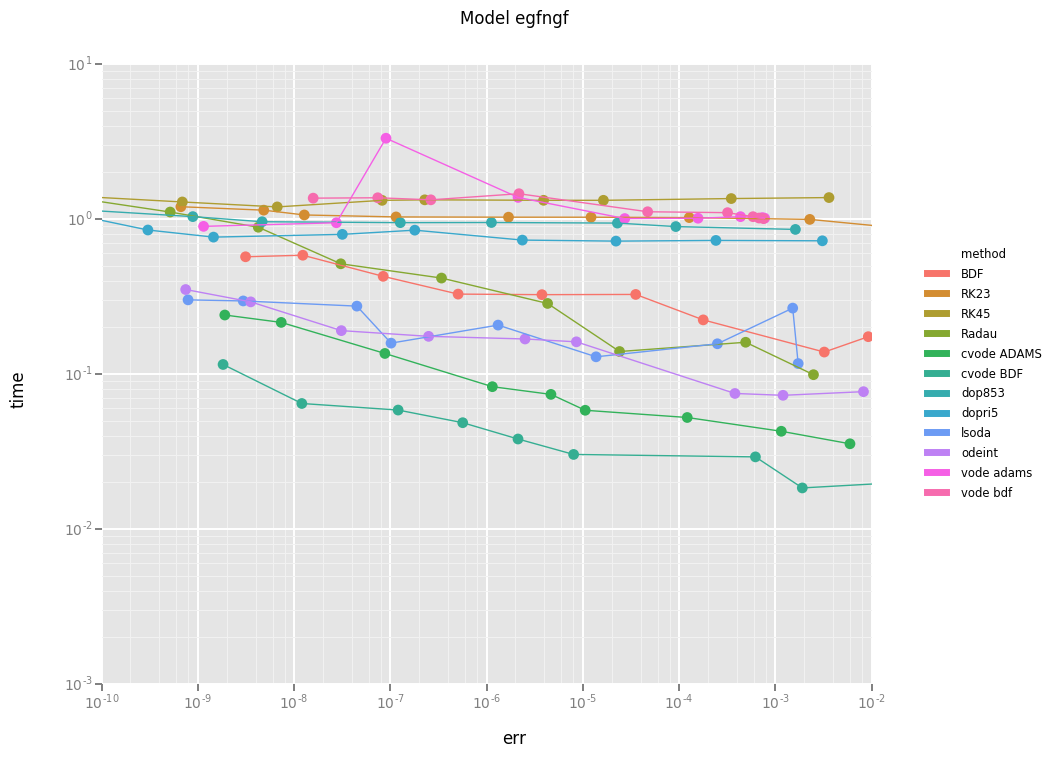

<ggplot: (-9223363281804963012)>


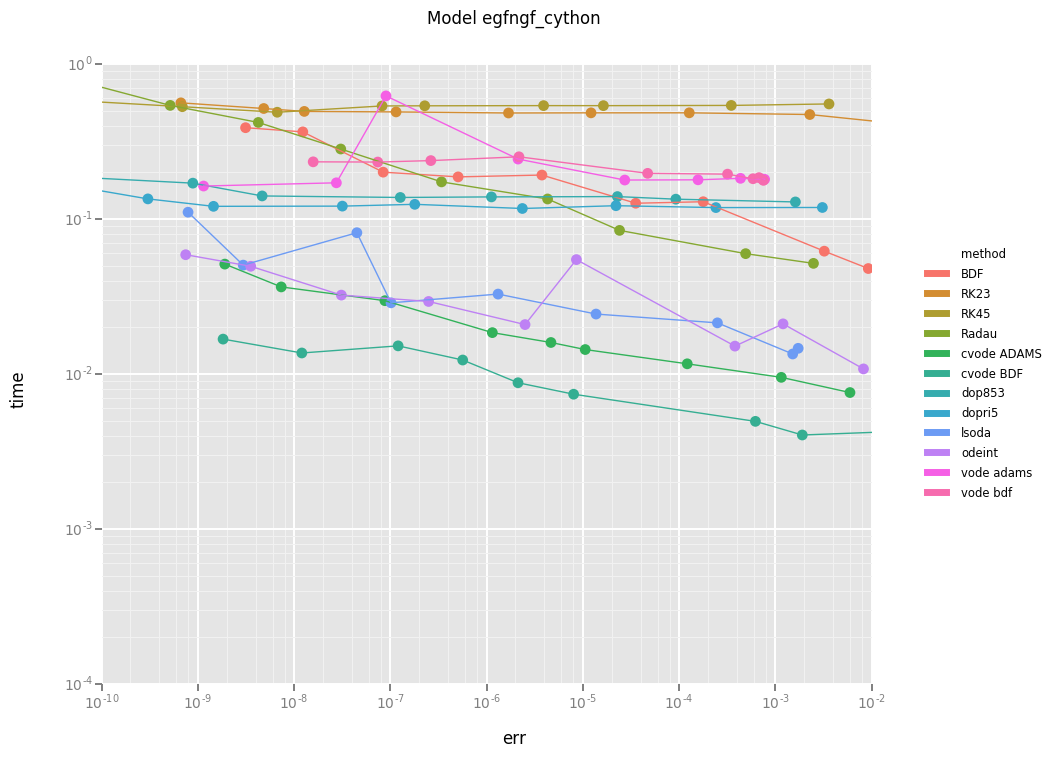

<ggplot: (-9223363281804838975)>


In [13]:
for model in models:
   
    print(gg.ggplot(data[data.model == model.name], gg.aes(x='err', y='time', color='method'))
      + gg.geom_point(size=60.0)
      + gg.geom_line()
      + gg.scale_x_log()
      + gg.scale_y_log()
      + gg.xlim(1e-10, 1e-2)
      + gg.ggtitle('Model ' + model.name)
         )

In above plot, cvode (ADAMS or BDF) is the scikits.odes method. For the pure python case and the cython case, cvode BDF is the best performing integrator. 
Note that lsoda and odeint don't show the smooth rate as cvode does, with timings sometimes much higher for unknown reasons.